<a href="https://colab.research.google.com/github/Inventrohyder/NS166_final/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Authenticate the Google user
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [2]:
# Access the Google Sheet
worksheet = gc.open_by_key('1Ik1wZgqpTwPdoTVP0m_1WU4Gm2IFU43L9q7bnhXwnsc')
worksheet = worksheet.worksheet('NYST_Future')
data = worksheet.get_all_values()

In [3]:
# Transform the Google Sheet data to a Pandas DataFrame
import pandas as pd
import numpy as np
df = pd.DataFrame(data[1:], columns=data[0])

# Clean the data
df = df.replace('',np.nan)
df = df.replace('N/A', np.nan)
for column in df.columns:
  df[column] = df[column].astype('float64', errors='ignore')
df.head()

,ID,QUADNAME,Easting,Northing,Current_July_Temp,Current_Precipit,Future_temp,Future_precipit,Current_with_mink
0,1.0,ROUSES POINT,633135.654,4977693.14,20.85,844.0,23.35,970.60,0.0
1,2.0,CHAMPLAIN,623273.036,4977637.88,20.60,832.0,23.10,956.80,0.0
2,3.0,MOOERS,613536.834,4976568.65,20.60,834.0,23.10,959.10,1.0
3,4.0,RAQUETTE RIVER,514878.984,4975810.76,20.90,891.0,23.40,1024.65,0.0
4,5.0,ALTONA,603557.797,4976608.70,20.25,854.0,22.75,982.10,0.0


In [14]:
X = df[['Current_July_Temp', 'Current_Precipit']].to_numpy()
y = df['Current_with_mink'].apply(int).to_numpy()

Automatically created module for IPython interactive environment
name: Nearest Neighbors ; score 0.8201058201058201
name: Linear SVM ; score 0.8835978835978836
name: RBF SVM ; score 0.8994708994708994
name: Gaussian Process ; score 0.9047619047619048
name: Decision Tree ; score 0.8783068783068783
name: Random Forest ; score 0.8994708994708994
name: Neural Net ; score 0.9047619047619048
name: AdaBoost ; score 0.8941798941798942
name: Naive Bayes ; score 0.873015873015873
name: QDA ; score 0.873015873015873


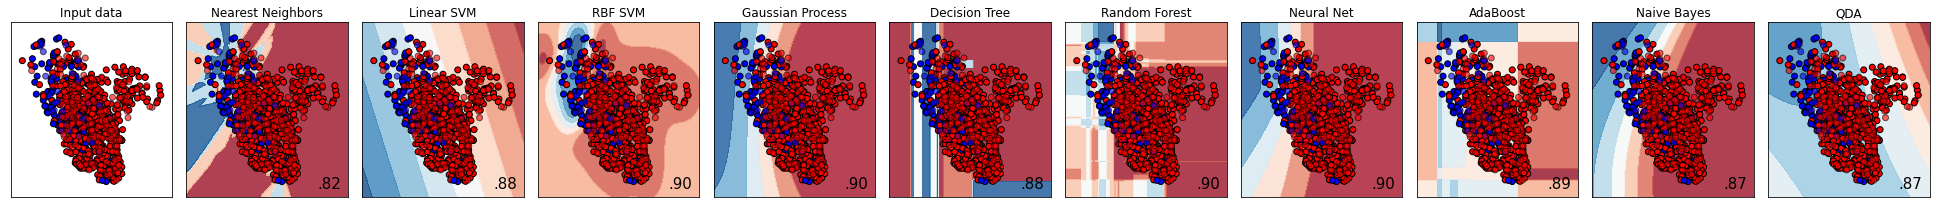

In [18]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# Modified to fit the frogs by Haitham Alhad
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


current_data = (X, y)

datasets = [current_data]

figure = plt.figure(figsize=(27, 3))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print('name:', name, '; score', score)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()